In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [5]:
!ls ../../all/

data_description.txt     test.csv                 train.csv.gz
sample_submission.csv    test.csv.gz
sample_submission.csv.gz train.csv


In [6]:
#change the data path here
data = pd.read_csv("../../all/train.csv", index_col = 0)

In [7]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


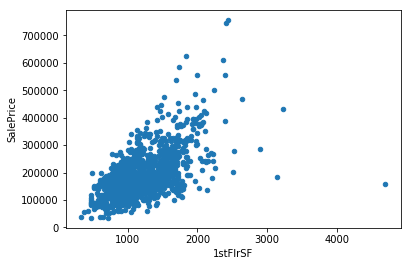

In [8]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

In [9]:
import seaborn as sns

def reg_plots(df, target):
    columns = df.select_dtypes(include=['number']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for i in range(len(columns)):
        sns.regplot(df[columns[i]], df[target], ax=axarr[i])

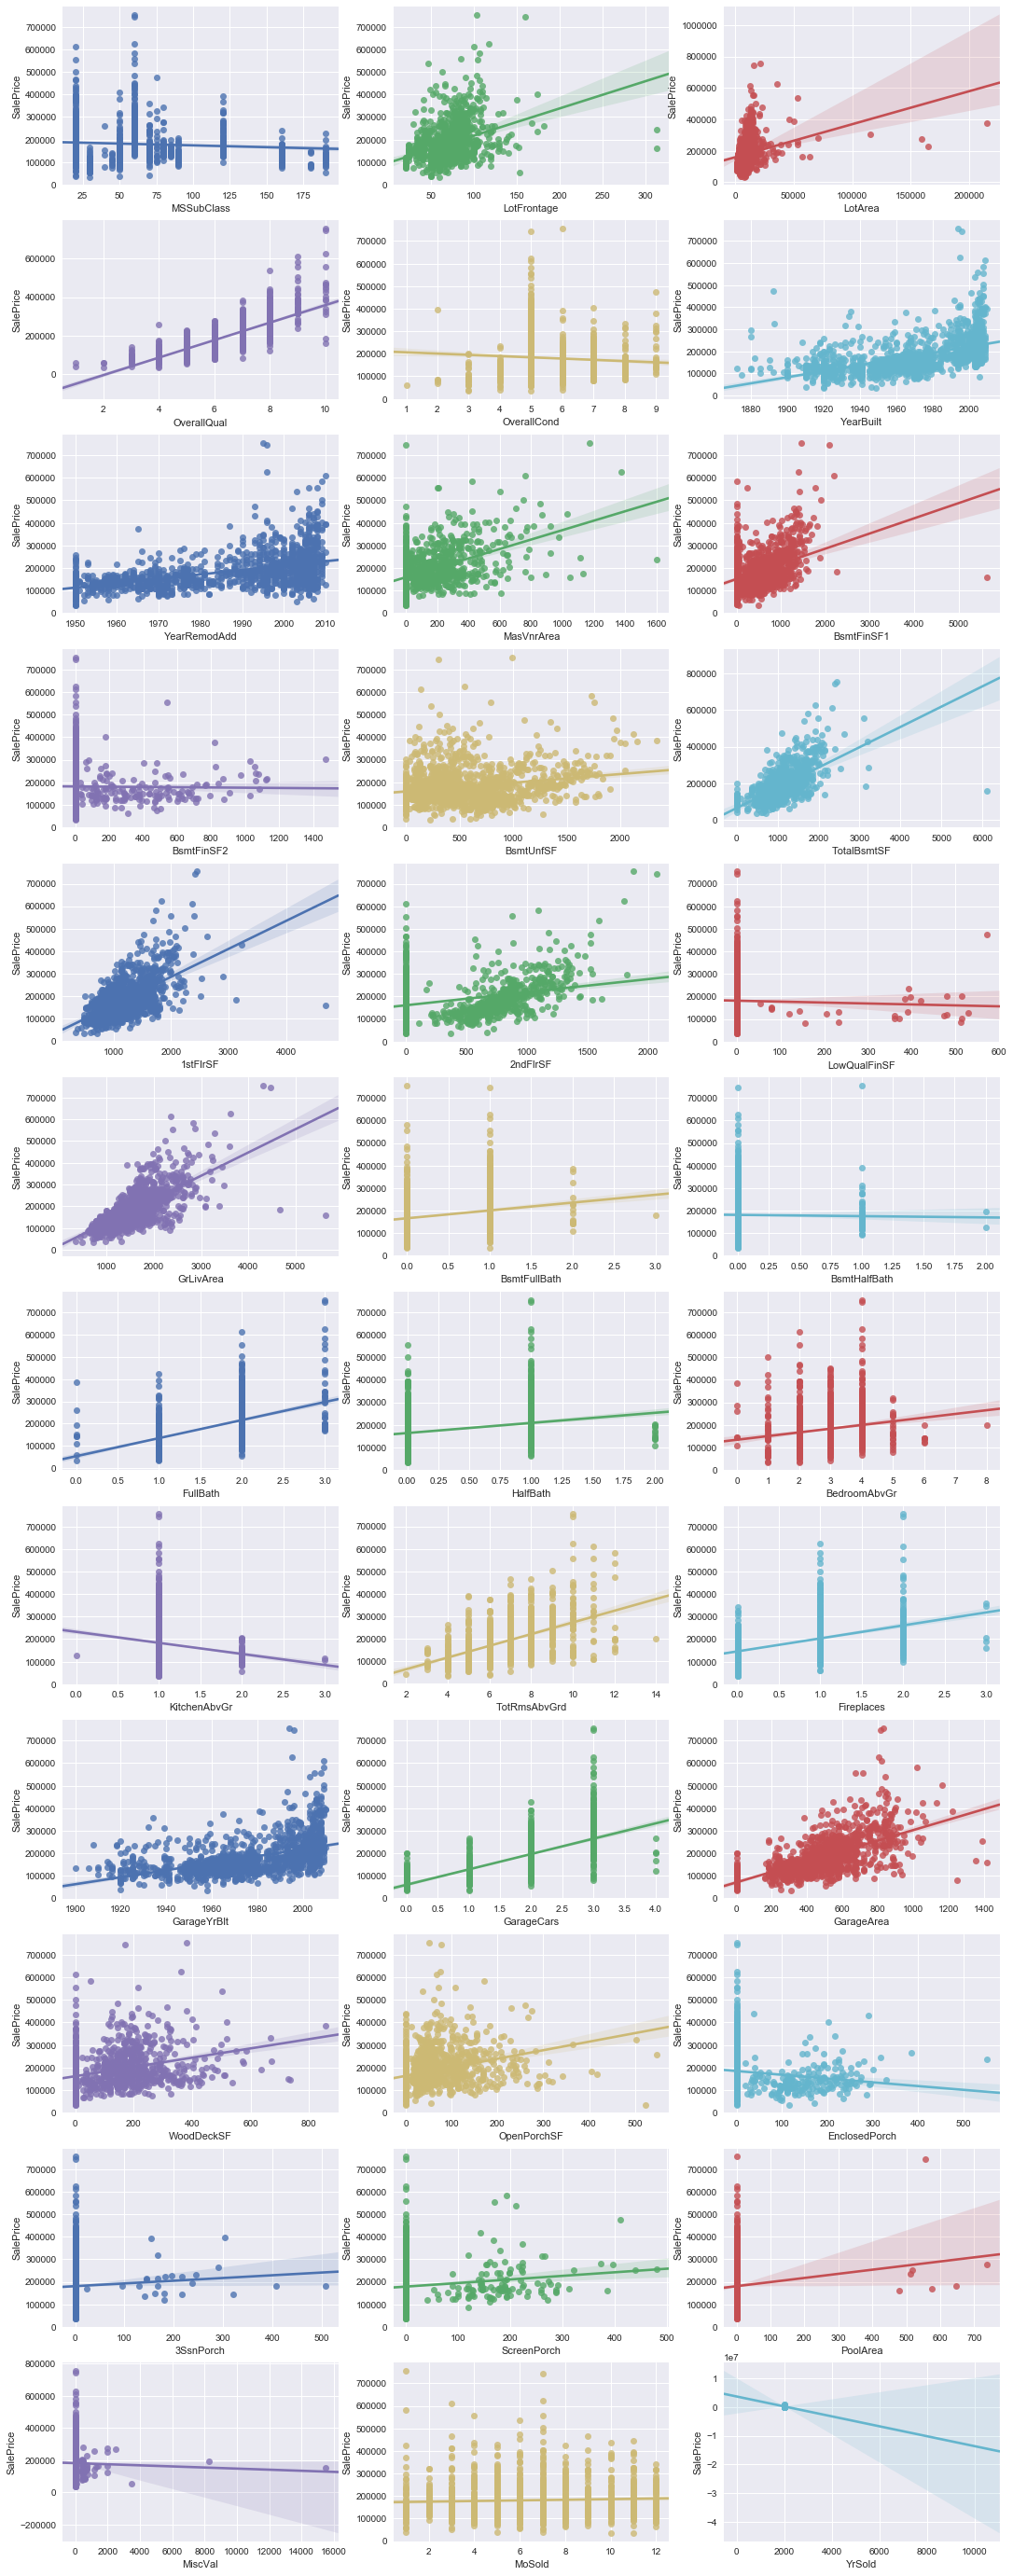

In [60]:
reg_plots(data, 'SalePrice')

In [104]:
from sklearn.metrics import mean_squared_error as mse


def linear_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        train_prediction = regr.predict(x_validation)
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        axarr[j].scatter(x_validation, y_validation, color = 'black')
        axarr[j].plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
        axarr[j].set_xlabel(i)
        axarr[j].set_ylabel(target)
        axarr[j].text(0.2,0.8,"RMSE: "+ str(RMSE)+'\nCoefficients: '+str(round(regr.coef_[0][0])),\
                     transform=axarr[j].transAxes)

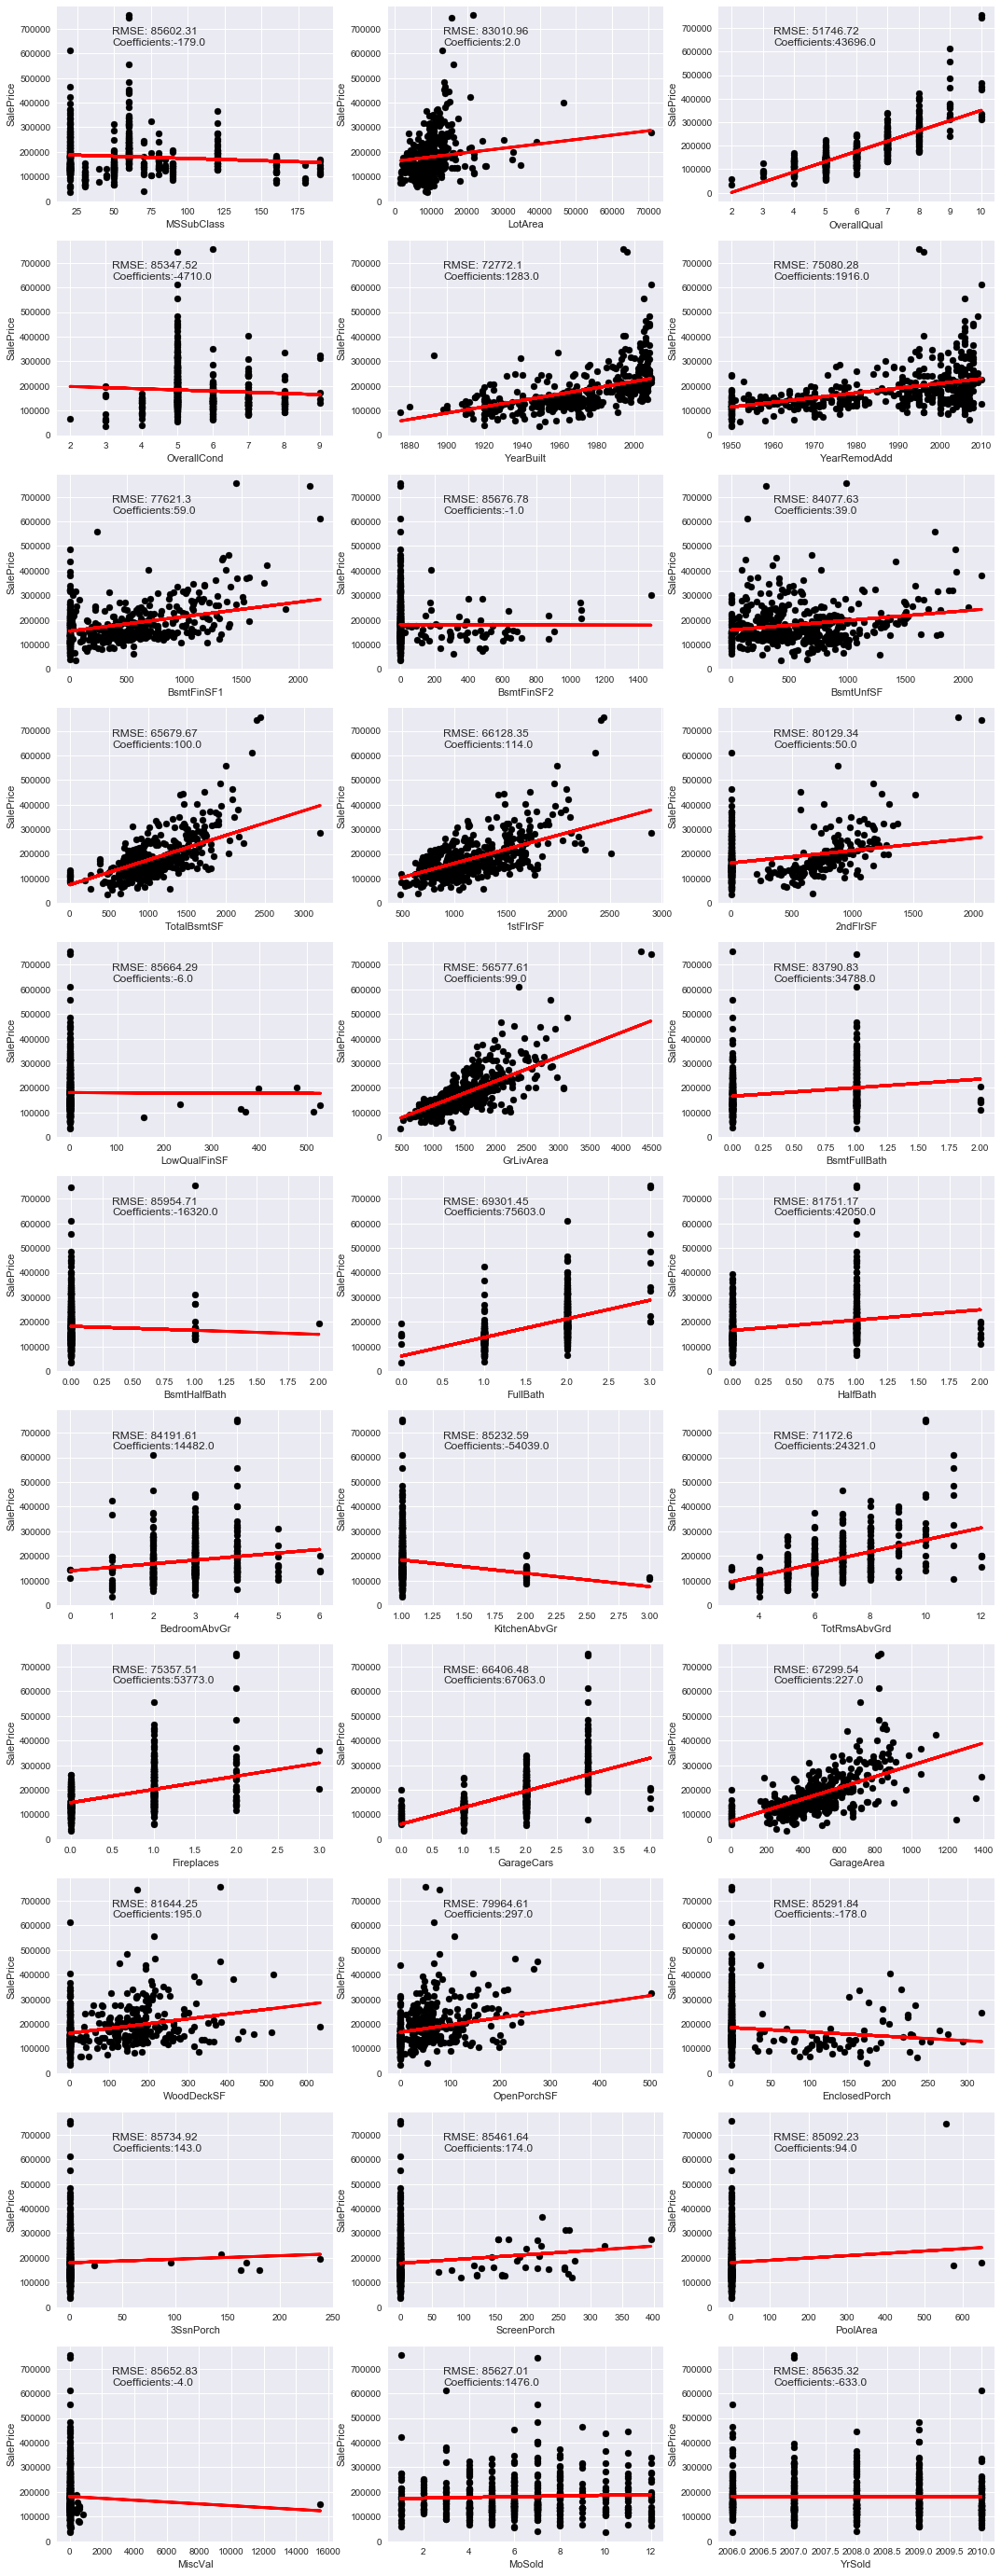

In [105]:
linear_regression(data, 'SalePrice')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d1a2198>]], dtype=object)

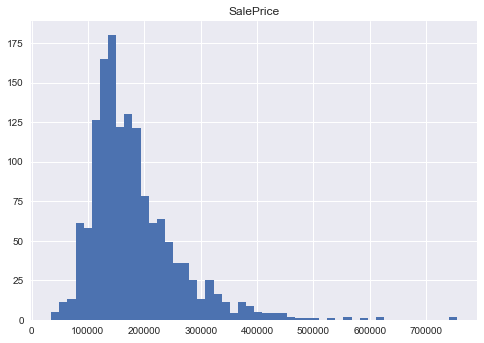

In [70]:
data.hist("SalePrice", bins = 50)